<a href="https://colab.research.google.com/drive/1sIDu7ycyzeKGzYxTjW57DFBDwPWrL4bn?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the required packages

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Mock dataset

In [ ]:
x_mock=np.array((1.0,2.0,3.0,4.0,5.0))
y_mock=np.array((2.3,4.1,6.2,8.1,10.0))
err_y_mock=np.array((0.08, 0.12, 0.2 , 0.16, 0.28))

#Plot datapoint

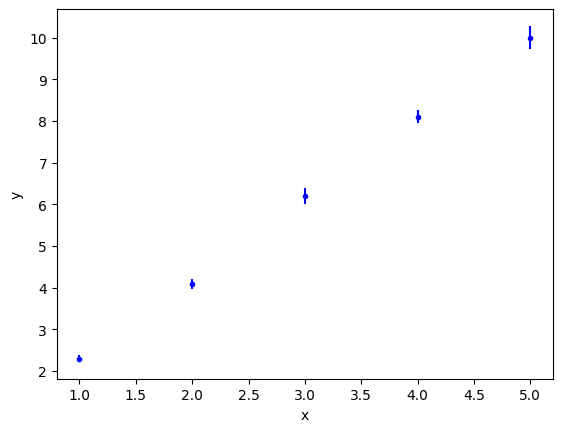

In [ ]:
plt.errorbar(x_mock,y_mock,err_y_mock,fmt='b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Perform Chi-square analysis

In [ ]:
a_arr=[]
b_arr=[]
chi_sq_arr=[]
for a in np.arange(0,1,0.001):
    for b in np.arange(0.0,3,0.005):
      chi_sq=0
      for i in range(0,len(x_mock)):
          y_th=a+b*x_mock[i]
          chi_sq1=((y_mock[i]-y_th)/err_y_mock[i])**2
          chi_sq=chi_sq+chi_sq1
      a_arr.append(a)
      b_arr.append(b)
      chi_sq_arr.append(chi_sq)


#Save Arrays in a Text file

In [ ]:
np.savetxt('store_file.txt',np.transpose([a_arr,b_arr,chi_sq_arr]),fmt='%10.5f',newline='\n',delimiter=' ')


#Load text file using Pandas

In [ ]:
df = pd.read_csv ('store_file.txt',sep="\s+",names=["a","b","chi2"])


In [ ]:
df

,a,b,chi2
0,0.000,0.000,6793.32444
1,0.000,0.005,6760.39252
2,0.000,0.010,6727.54074
3,0.000,0.015,6694.76911
4,0.000,0.020,6662.07762
...,...,...,...
599995,0.999,2.975,2687.95226
599996,0.999,2.980,2708.60251
599997,0.999,2.985,2729.33291
599998,0.999,2.990,2750.14345


#Find minimim $\chi^2$ values

In [ ]:
df_min=df.loc[df['chi2'].idxmin()]
df_min

a       0.34400
b       1.93000
chi2    1.01672
Name: 206786, dtype: float64

#Estimate Confidence Intervals

##$68.27\%$ confidence level

In [ ]:
df_1_sig = df[(round(df['chi2'], 3) >= round(df_min[2], 3) + 2.2) & (round(df['chi2'], 3) <= round(df_min[2], 3) + 2.4)]
df_1_sig

,a,b,chi2
104798,0.174,1.990,3.41218
104799,0.174,1.995,3.40496
105398,0.175,1.990,3.38050
105399,0.175,1.995,3.37918
105998,0.176,1.990,3.34943
...,...,...,...
304573,0.507,1.865,3.40448
304574,0.507,1.870,3.35887
304575,0.507,1.875,3.39341
305174,0.508,1.870,3.38703


##Plot $68.27\%$ Confidence Level

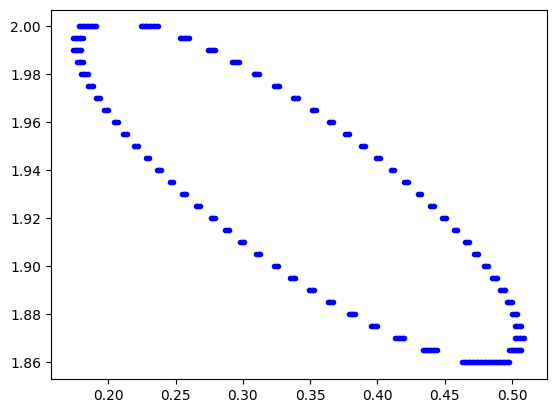

In [ ]:
plt.plot(df_1_sig['a'],df_1_sig['b'],'b.')

##$95.45\%$ confidence level

In [ ]:
df_2_sig = df[(round(df['chi2'], 3) >= round(df_min[2], 3) + 6.15) & (round(df['chi2'], 3) <= round(df_min[2], 3) + 6.21)]

df_2_sig

,a,b,chi2
43606,0.072,2.030,7.19208
43607,0.072,2.035,7.22406
44205,0.073,2.025,7.18818
44207,0.073,2.035,7.18378
45404,0.075,2.020,7.19645
...,...,...,...
365765,0.609,1.825,7.22519
365768,0.609,1.840,7.21123
366366,0.610,1.830,7.18304
366367,0.610,1.835,7.18429


##Plot $95.45\%$ Confidence Level

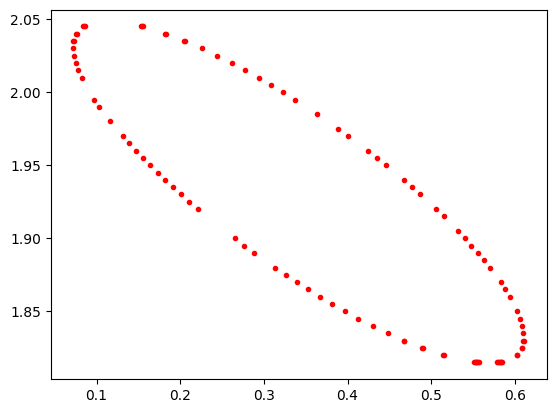

In [ ]:
plt.plot(df_2_sig['a'],df_2_sig['b'],'r.')

##$99.70\%$ confidence level

In [ ]:
df_3_sig = df[(round(df['chi2'], 3) >= round(df_min[2], 3) + 11.81) & (round(df['chi2'], 3) <= round(df_min[2], 3) + 11.85)]

df_3_sig

,a,b,chi2
2204,0.003,2.020,12.83036
9402,0.015,2.010,12.84343
30397,0.050,1.985,12.84835
43018,0.071,2.090,12.84132
43618,0.072,2.090,12.86536
...,...,...,...
425762,0.709,1.810,12.86016
426957,0.711,1.785,12.83838
428158,0.713,1.790,12.82930
428160,0.713,1.800,12.84536


##Plot $99.7\%$ Confidence Level

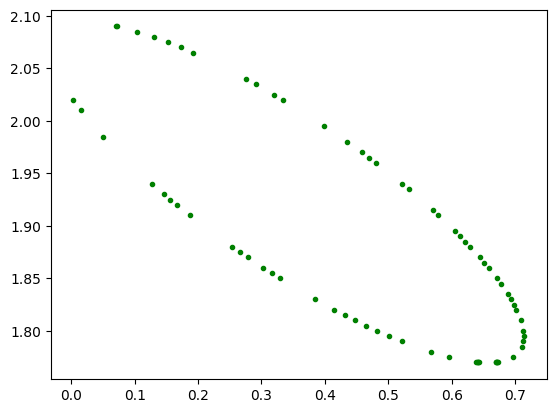

In [ ]:
plt.plot(df_3_sig['a'],df_3_sig['b'],'g.')

##Final Output

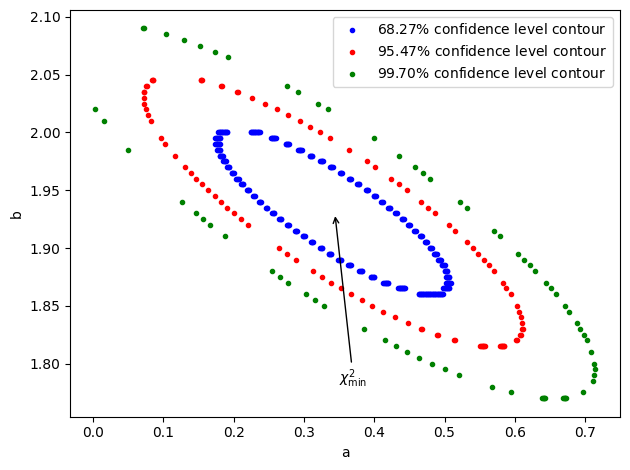

In [ ]:
plt.xlabel('a')
plt.ylabel("b")
plt.plot(df_1_sig['a'], df_1_sig['b'],'b.',label='$68.27\%$ confidence level contour')
plt.plot(df_2_sig['a'], df_2_sig['b'],'r.',label='$95.47\%$ confidence level contour')
plt.plot(df_3_sig['a'], df_3_sig['b'],'g.',label='$99.70\%$ confidence level contour')
plt.legend(loc="upper right")
plt.annotate("$\chi^2_{\mathrm{min}}$", xy=(df_min[0],df_min[1]), xytext=(0.35, 1.783), arrowprops=dict(arrowstyle="->"))
plt.tight_layout()

##Save Final Output

In [ ]:
plt.savefig('Linear_model_fit_mock_data_Basic.pdf', format='pdf', dpi=1200)


<Figure size 640x480 with 0 Axes>